## Preview:

- 기존 데이터의 모든 변수를 포함한 model5의 다중공선성 검사 결과, 10이상의 VIF 값이 다중공선성이 의심된다고 판단하였을 때 변수들의 다중공선성이 4~6의 값이 나와 다중공선성을 없다고 최초 판단

- 하지만 피드백에서 랭크화한 특정변수들의 VIF 값들이 원래 더 낮아야 한다는 지적 나옴

- 개선방안으로 직업과 학력의 관계, 예를 들어 고학력일수록 관리, 전문직종일 가능성과 같은 관계 탐색이 제시됨

- 교호작용 고려, 특정 값을 가지는 변수들만의 관계 고려 등 구체화

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from IPython.display import Image

import seaborn as sns
import matplotlib.pylab as plt
sns.set_theme(style='whitegrid', font_scale=1.5)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
data = pd.read_csv('2022.csv', encoding='CP949')
data.rename(columns={ '가구주_성별코드':'성별', '가구주_교육정도_학력코드':'학력', '가구주_직업대분류코드':'직업', '가구주_만연령':'연령',
       '자산_금융자산_저축금액':'저축', '자산_실물자산_부동산금액':'부동산', '부채_금융부채_담보대출금액':'담보대출', '부채_금융부채_신용대출금액':'신용대출',
       '경상소득(보완)':'소득', '지출_소비지출_식료품(외식비포함)':'식료지출', '지출_소비지출_주거비':'주거지출', '지출_소비지출_교육비(보육료포함)':'교육지출',
       '지출_비소비지출_세금(보완)':'세금'},inplace=True)
data['학력'] = data['학력'].astype('category')
data['직업'].fillna('기타',inplace=True)

In [63]:
# 학력 코드를 기준으로, 6,7,8을 고학력으로 라벨링

data['고학력']=0
data.loc[data['학력'].isin([6,7,8]),'고학력']=1
data['고학력']=data['고학력'].astype('category')

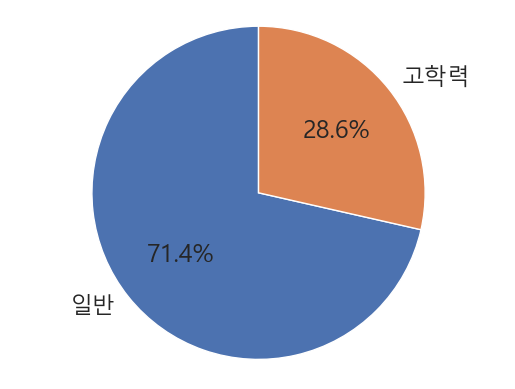

In [64]:
labels = ['일반', '고학력']
sizes = data['고학력'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.show()

In [65]:
data.head(3)

,수도권여부,성별,가구원수,학력,직업,연령,저축,부동산,담보대출,신용대출,소득,식료지출,주거지출,교육지출,세금,고학력
0,G1,1,1,1,기타,64,1,0,0,0,1379,660,312,0,0,0
1,G1,1,1,1,기타,74,2400,19300,0,0,1841,450,190,0,23,0
2,G1,1,1,1,기타,81,200,0,0,0,954,500,300,0,0,0


In [66]:
model_degree=smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 +고학력+ C(학력, Treatment(reference=6))', data = data).fit()
model_degree.summary()
# 표준화하지 않은 모델, 설명력 0.757
# 직업2,3, a, 학력1,2, 교유지출 유의하지않음
# 고학력이면 소득 687 만큼

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1928.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:11:10   Log-Likelihood:            -1.6865e+05
No. Observations:               17954   AIC:                         3.374e+05
Df Residuals:                   17924   BIC:                         3.376e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1581.4293    208.688      7.578      0.000    1172.381    1990.478
직업[T.2]                             -299.4198    177.842     -1.684      0.092    -648.006      49.167
직업[T.3]                             -317.9821    178.157     -1.785      0.074    -667.187      31.223
직업[T.4]                            -1066.9899    188.549     -5.659      0.000   -1436.563    -697.417
직업[T.5]                             -844.7406    187.010     -4.517      0.000   -1211.298    -478.183
직업[T.6]                            -1110.2643    191.542     -5.796      0.000   -1485.705    -734.823
직업[T.7]                             -870.3256    184.404     -4.720      0.000   -1231.775    -508.877
직업[T.8]                             -597.6533    181.320     -3.296      0.001    -953.058    -242.248
직업[T.9]                            -1432.6523    182.350     -7.857      0.000   -1790.076   -1075.228
직업[T.A]                              450.4752    629.232      0.716      0.474    -782.881    1683.831
직업[T.기타]                           -2211.9227    177.679    -12.449      0.000   -2560.191   -1863.654
수도권여부[T.G2]                          177.4796     48.569      3.654      0.000      82.280     272.680
고학력[T.1]                             682.8192     57.999     11.773      0.000     569.135     796.503
C(학력, Treatment(reference=6))[T.1]   -81.3203    108.502     -0.749      0.454    -293.994     131.354
C(학력, Treatment(reference=6))[T.2]   -52.2668     75.576     -0.692      0.489    -200.403      95.869
C(학력, Treatment(reference=6))[T.3]   235.3970     71.509      3.292      0.001      95.233     375.561
C(학력, Treatment(reference=6))[T.4]   372.2819     51.868      7.177      0.000     270.616     473.948
C(학력, Treatment(reference=6))[T.5]   424.5184     68.253      6.220      0.000     290.737     558.300
C(학력, Treatment(reference=6))[T.7]   533.8997    118.783      4.495      0.000     301.074     766.726
C(학력, Treatment(reference=6))[T.8]  1151.9619    194.733      5.916      0.000     770.266    1533.658
성별                                  -318.0338     57.672     -5.515      0.000    -431.076    -204.992
가구원수                                 867.4409     25.251     34.352      0.000     817.946     916.936
연령                                     7.5518      2.158      3.499      0.000       3.321      11.783
저축                                     0.0310      0.001     23.964      0.000       0.028       0.034
부동산                                    0.0040      0.000      9.618      0.000       0.003       0.005
담보대출                                   0.0160      0.002      8.366      0.000       0.012       0.020
신용대출                                   0.0868      0.007     12.728      0.000       0.073      

In [67]:
# 고학력 추가

import patsy
y, X = patsy.dmatrices('소득 ~ 성별 + 가구원수+ 연령  + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 +학력+고학력', data, return_type='matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 169.81309610040387
VIF of 직업[T.2] : 6.7080838399420575
VIF of 직업[T.3] : 6.201924108007746
VIF of 직업[T.4] : 4.683874495612613
VIF of 직업[T.5] : 4.482022966332495
VIF of 직업[T.6] : 5.092073469327978
VIF of 직업[T.7] : 5.344201670612256
VIF of 직업[T.8] : 6.399369250618615
VIF of 직업[T.9] : 7.37586727748963
VIF of 직업[T.A] : 1.0750654729051397
VIF of 직업[T.기타] : 12.988670848172275
VIF of 수도권여부[T.G2] : 1.0915565167414567
VIF of 학력[T.2] : 3.323440498000517
VIF of 학력[T.3] : 3.225086870370966
VIF of 학력[T.4] : 6.403677786459702
VIF of 학력[T.5] : 4.04300626793429
VIF of 학력[T.6] : inf
VIF of 학력[T.7] : inf
VIF of 학력[T.8] : inf
VIF of 고학력[T.1] : inf
VIF of 성별 : 1.422673811102448
VIF of 가구원수 : 2.007487169389685
VIF of 연령 : 2.2853614227559285
VIF of 저축 : 1.2863636333241786
VIF of 부동산 : 1.812739054868968
VIF of 담보대출 : 1.3688080220473449
VIF of 신용대출 : 1.0646442444379183
VIF of 식료지출 : 2.0104282178943325
VIF of 주거지출 : 1.1504568866777372
VIF of 교육지출 : 1.566213519584059
VIF of 세금 : 1.318832657531

In [68]:
# 학력 제거, 고학력 추가

import patsy
y, X = patsy.dmatrices('소득 ~ 성별 + 가구원수+ 연령  + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 +고학력', data, return_type='matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 114.11564482577083
VIF of 직업[T.2] : 6.645672070466322
VIF of 직업[T.3] : 6.201260260525855
VIF of 직업[T.4] : 4.67261476843657
VIF of 직업[T.5] : 4.478662187959094
VIF of 직업[T.6] : 5.066287682506302
VIF of 직업[T.7] : 5.337990634758081
VIF of 직업[T.8] : 6.3851177743672825
VIF of 직업[T.9] : 7.3477962889689685
VIF of 직업[T.A] : 1.0741723709848232
VIF of 직업[T.기타] : 12.976937252306818
VIF of 수도권여부[T.G2] : 1.0863542506021193
VIF of 고학력[T.1] : 1.50769993413911
VIF of 성별 : 1.3424397855118495
VIF of 가구원수 : 1.997349225164386
VIF of 연령 : 1.8294680232124527
VIF of 저축 : 1.283452367250996
VIF of 부동산 : 1.791095977105013
VIF of 담보대출 : 1.3668980428418014
VIF of 신용대출 : 1.0629799110912004
VIF of 식료지출 : 1.9965048485473191
VIF of 주거지출 : 1.144781260110721
VIF of 교육지출 : 1.548201989504536
VIF of 세금 : 1.3133983096646726


## 교호작용항

In [69]:
model_cross=smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 +직업 * 학력', data = data).fit()
model_cross.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     606.7
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:11:15   Log-Likelihood:            -1.6857e+05
No. Observations:               17954   AIC:                         3.373e+05
Df Residuals:                   17860   BIC:                         3.381e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          292.6397   2056.463      0.142      0.887   -3738.227    4323.506
직업[T.2]            381.8975   3552.707      0.107      0.914   -6581.752    7345.547
직업[T.3]           1167.8007   2647.616      0.441      0.659   -4021.783    6357.384
직업[T.4]            150.6180   2193.535      0.069      0.945   -4148.923    4450.159
직업[T.5]           -730.9878   2193.421     -0.333      0.739   -5030.304    3568.329
직업[T.6]           -356.5148   2074.109     -0.172      0.864   -4421.969    3708.939
직업[T.7]            157.9407   2293.118      0.069      0.945   -4336.793    4652.674
직업[T.8]            847.6156   2267.155      0.374      0.709   -3596.227    5291.458
직업[T.9]           -496.8347   2066.739     -0.240      0.810   -4547.844    3554.174
직업[T.A]             55.3970    600.515      0.092      0.927   -1121.670    1232.464
직업[T.기타]          -889.6721   2056.198     -0.433      0.665   -4920.020    3140.676
수도권여부[T.G2]        177.3732     48.567      3.652      0.000      82.178     272.568
학력[T.2]           2752.7758   3553.478      0.775      0.439   -4212.386    9717.937
학력[T.3]           2841.5951   2325.718      1.222      0.222   -1717.037    7400.227
학력[T.4]           1135.1271   2083.354      0.545      0.586   -2948.449    5218.703
학력[T.5]           3534.9439   2092.475      1.689      0.091    -566.510    7636.398
학력[T.6]           1563.0141   2063.848      0.757      0.449   -2482.328    5608.356
학력[T.7]           3563.7410   2132.317      1.671      0.095    -615.807    7743.289
학력[T.8]            887.9234   2218.654      0.400      0.689   -3460.852    5236.699
직업[T.2]:학력[T.2]  -2255.4074   4883.175     -0.462      0.644   -1.18e+04    7316.089
직업[T.3]:학력[T.2]  -3356.8923   4059.549     -0.827      0.408   -1.13e+04    4600.216
직업[T.4]:학력[T.2]  -2734.2765   3646.957     -0.750      0.453   -9882.665    4414.112
직업[T.5]:학력[T.2]  -1561.4958   3658.852     -0.427      0.670   -8733.200    5610.208
직업[T.6]:학력[T.2]  -2603.7474   3569.432     -0.729      0.466   -9600.179    4392.684
직업[T.7]:학력[T.2]  -2085.9696   3711.813     -0.562      0.574   -9361.483    5189.544
직업[T.8]:학력[T.2]  -2981.7362   3696.752     -0.807      0.420   -1.02e+04    4264.255
직업[T.9]:학력[T.2]  -2581.2208   3564.357     -0.724      0.469   -9567.706    4405.264
직업[T.A]:학력[T.2]  -3.106e-07   1.96e-07     -1.586      0.113   -6.94e-07    7.33e-08
직업[T.기타]:학력[T.2] -2763.1650   3556.600     -0.777      0.437   -9734.446    4208.116
직업[T.2]:학력[T.3]  -2943.0025   3829.450     -0.769      0.442   -1.04e+04    4563.091
직업[T.3]:학력[T.3]  -3316.7949   2928.657     -1.133      0.257   -9057.246    2423.657
직업[T.4]:학력[T.3]  -2778.7550   2462.564     -1.128      0.259   -7605.618    2048.108
직업[T.5]:학력[T.3]  -1485.2718   2475.890     -0.600      0.549   -6338.255    3367.712
직업[T.6]:학력[T.3]  -1891.

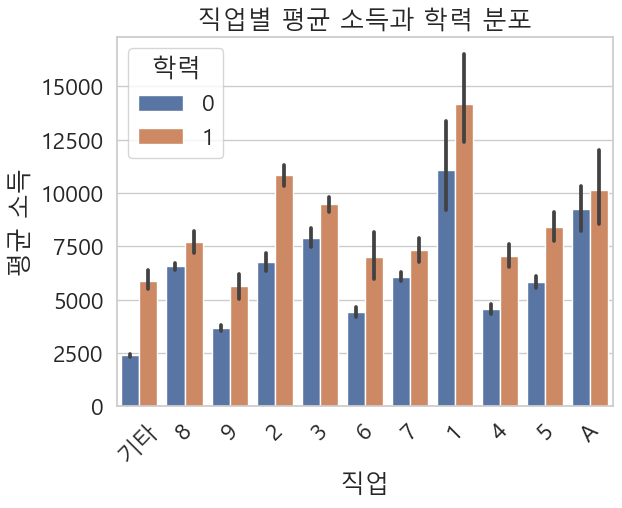

In [73]:

sns.barplot(data=data, x='직업', y='소득',hue='고학력', estimator=np.mean)
plt.xlabel('직업')
plt.ylabel('평균 소득')
plt.title('직업별 평균 소득과 학력 분포')

plt.xticks(rotation=45)
plt.legend(title='학력')
plt.show()


Text(0.5, 1.0, '직업별 고학력 여부')

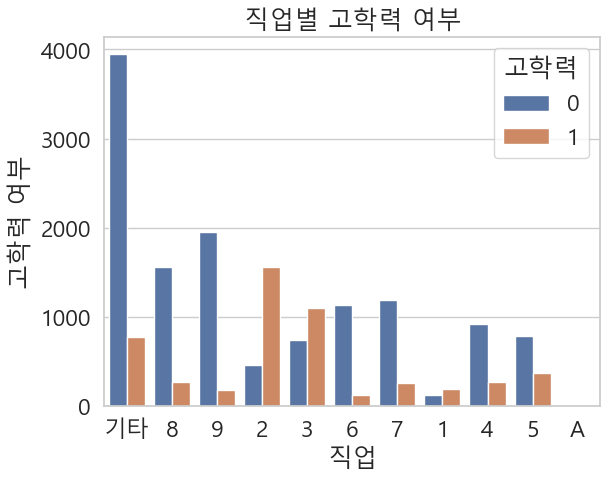

In [79]:
sns.countplot(data=data, x='직업', hue='고학력')
plt.xlabel('직업')
plt.ylabel('고학력 여부')
plt.title('직업별 고학력 여부')